In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hajiB\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data=xr.open_dataset("A:\IISC INT\Monsoon_data_mn_5678\T\dailymax_tem_monsoon_mn5678.nc")

In [4]:
data

<xarray.Dataset> Size: 461MB
Dimensions:     (latitude: 153, longitude: 153, valid_time: 4920)
Coordinates:
  * latitude    (latitude) float64 1kB 43.0 42.75 42.5 42.25 ... 5.5 5.25 5.0
  * longitude   (longitude) float64 1kB 62.0 62.25 62.5 ... 99.5 99.75 100.0
  * valid_time  (valid_time) datetime64[ns] 39kB 1985-05-01 ... 2024-08-31
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 461MB ...

In [5]:
data.t2m

<xarray.DataArray 't2m' (valid_time: 4920, latitude: 153, longitude: 153)> Size: 461MB
[115172280 values with dtype=float32]
Coordinates:
  * latitude    (latitude) float64 1kB 43.0 42.75 42.5 42.25 ... 5.5 5.25 5.0
  * longitude   (longitude) float64 1kB 62.0 62.25 62.5 ... 99.5 99.75 100.0
  * valid_time  (valid_time) datetime64[ns] 39kB 1985-05-01 ... 2024-08-31
    number      int64 8B ...

In [40]:
import xarray as xr
import numpy as np

# Load your dataset
# Assuming `data` is an xarray.Dataset with dimensions (day, lat, lon)
# and variable `tmax` for daily maximum temperature
tmax = data.t2m

# Step 1: Calculate the 90th percentile threshold
threshold = tmax.quantile(0.9, dim='valid_time')

# Step 2: Identify days exceeding the threshold
exceedance = tmax > threshold


In [41]:
exceedance

<xarray.DataArray 't2m' (valid_time: 4920, latitude: 153, longitude: 153)> Size: 115MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [ True,  True, False, ..., False,  True, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * latitude    (latitude) float64 1kB 43.0 42.75 42.5 42.25 ... 5.5 5.25 5.0
  * longitude   (longitude) float64 1kB 62.0 62.25 62.5 ... 99.5 99.75 100.0
  * valid_time  (valid_time) datetime64[ns] 39kB 1985-05-01 ... 2024-08-31
    number      int64 8B ...
    quantile    float64 8B 0.9

In [42]:
heat_wave_mask = exceedance.rolling(valid_time=3, center=False).sum() >= 3


In [43]:
heat_wave_mask

<xarray.DataArray 't2m' (valid_time: 4920, latitude: 153, longitude: 153)> Size: 115MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * latitude    (latitude) float64 1kB 43.0 42.75 42.5 42.25 ... 5.5 5.25 5.0
  * longitude   (longitude) float64 1kB 62.0 62.25 62.5 ... 99.5 99.75 100.0
  * valid_time  (valid_time) datetime64[ns] 39kB 1985-05-01 ... 2024-08-31
    number      int64 8B ...
    quantile    float64 8B 0.9

In [44]:
heat_wave_days_per_year = heat_wave_mask.groupby('valid_time.year').sum(dim='valid_time')
# ABove is heat wave days in a year for one grid point

In [45]:
heat_wave_days_per_year

<xarray.DataArray 't2m' (year: 40, latitude: 153, longitude: 153)> Size: 4MB
array([[[ 5,  6,  6, ...,  0,  0,  0],
        [ 5,  5,  6, ...,  0,  0,  0],
        [ 5,  5,  6, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1]],

       [[ 3,  3,  3, ...,  3,  3,  4],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  2,  2,  2],
        ...,
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 0,  1,  1, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 1,  1,  1, ...,  3,  3,  3],
        [ 1,  1,  1, ...,  3,  3,  3],
        [ 1,  1,  1, ...,  3,  3,  3],
        ...,
...
        ...,
        [ 7,  5,  5, ...,  7,  5,  5],
        [ 5,  5,  5, ...,  8,  8, 10],
        [ 5,  3,  3, ..., 10,  9, 11]],

       [[ 6,  6,  5, ..., 11, 11, 11],
        [ 5,  5,  5, ..., 15, 15, 17],
        [ 5,  5,  5, ..., 16, 17, 16],
        ...,
        [ 9, 12, 10, ..., 12,  7,  7],
        [12, 11, 11, ..., 11,  6,  6],
        [11, 11, 11, ...,  7,  9,  9]],

       [[ 5,  4,  4, ...,  1,  1,  0],
        [ 5,  5,  4, ...,  1,  1,  0],
        [ 5,  5,  5, ...,  1,  1,  1],
        ...,
        [23, 21, 21, ..., 34, 37, 26],
        [21, 19, 19, ..., 38, 37, 32],
        [27, 21, 22, ..., 35, 35, 31]]])
Coordinates:
  * latitude   (latitude) float64 1kB 43.0 42.75 42.5 42.25 ... 5.5 5.25 5.0
  * longitude  (longitude) float64 1kB 62.0 62.25 62.5 ... 99.5 99.75 100.0
    number     int64 8B ...
    quantile   float64 8B 0.9
  * year       (year) int64 320B 1985 1986 1987 1988 ... 2021 2022 2023 2024

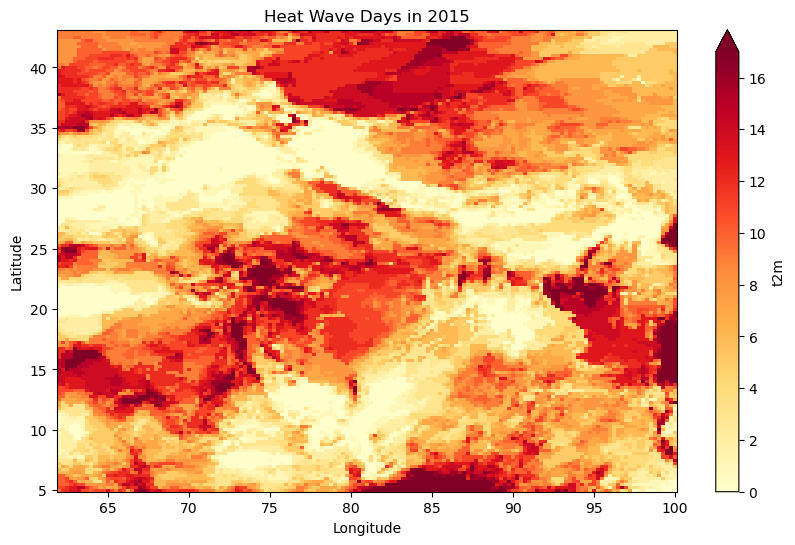

In [46]:
import matplotlib.pyplot as plt

# Plot heat_wave_days_per_year for a specific year (e.g., 1985)
year_of_interest = 2015
data_for_year = heat_wave_days_per_year.sel(year=year_of_interest)

# Create the plot and save the returned object for the colorbar
fig, ax = plt.subplots(figsize=(10, 6))
c = data_for_year.plot(ax=ax, cmap='YlOrRd', robust=True)

# Add the colorbar explicitly
# fig.colorbar(c, ax=ax, label='Number of Heat Wave Days')

plt.title(f'Heat Wave Days in {year_of_interest}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
